In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [4]:
df = pd.read_csv('delhiaqi.csv', parse_dates=['date'])
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [6]:
df.rename(columns={'pm2_5': 'PM2.5', 'pm10': 'PM10'}, inplace=True)


In [18]:
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon',
    9: 'Post-Monsoon', 10: 'Post-Monsoon', 11: 'Post-Monsoon'
})

In [17]:
def classify_aqi(pm25):
    if pm25 <= 30:
        return 'Good'
    elif pm25 <= 60:
        return 'Satisfactory'
    elif pm25 <= 90:
        return 'Moderate'
    elif pm25 <= 120:
        return 'Poor'
    elif pm25 <= 250:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['PM2.5'].apply(classify_aqi)


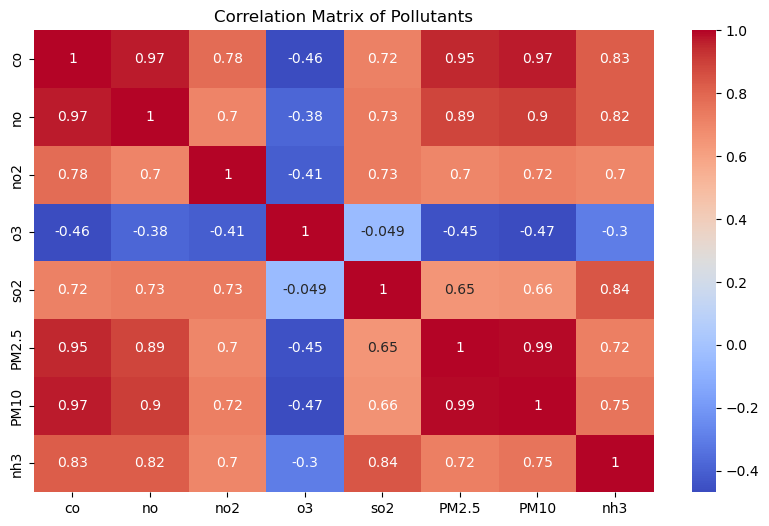

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')
plt.show()


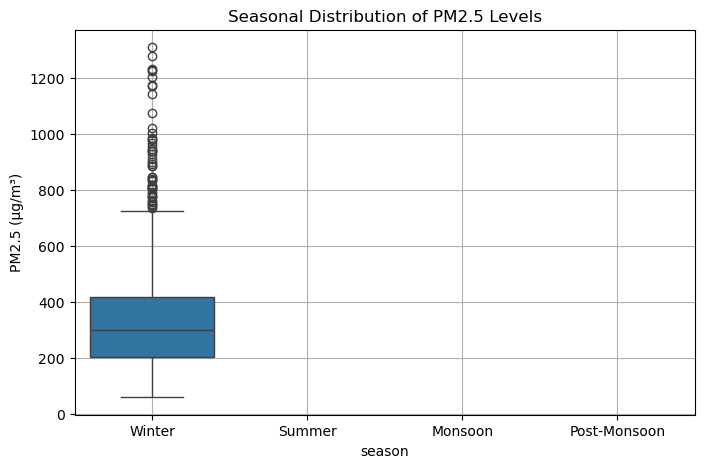

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='PM2.5', data=df, order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'])
plt.title('Seasonal Distribution of PM2.5 Levels')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


C:\Users\pnkjg\AppData\Local\Temp\ipykernel_17480\3664712552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AQI_Category', data=df,


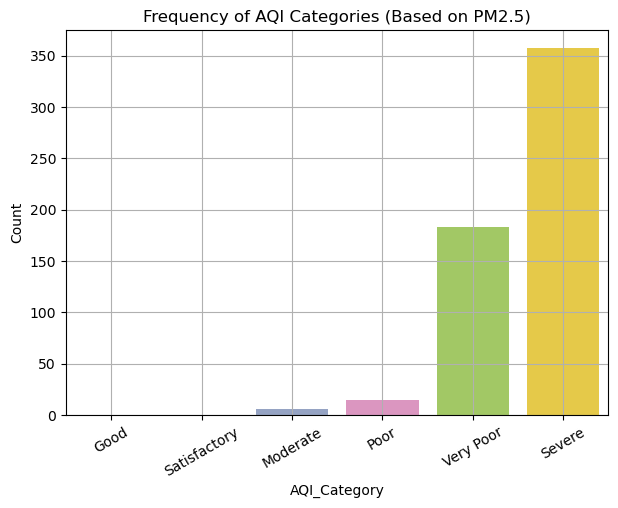

In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(x='AQI_Category', data=df,
              order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'],
              palette='Set2')
plt.title('Frequency of AQI Categories (Based on PM2.5)')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

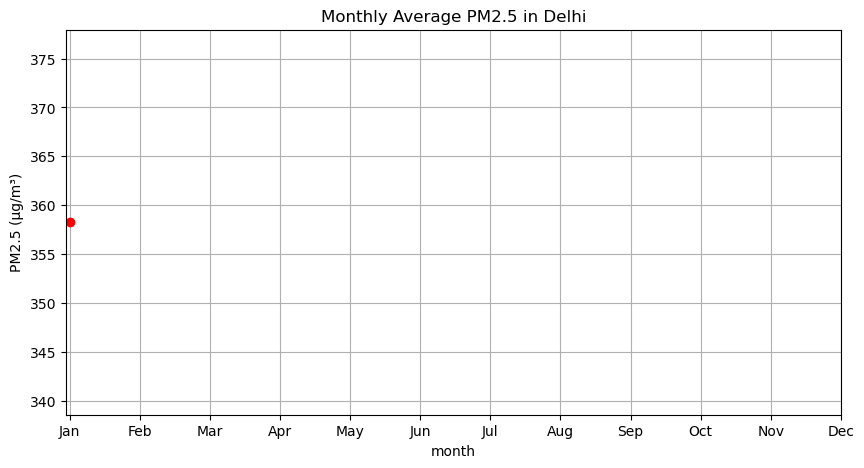

In [15]:
monthly_pm25 = df.groupby('month')['PM2.5'].mean()
plt.figure(figsize=(10, 5))
monthly_pm25.plot(marker='o', color='red')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Average PM2.5 in Delhi')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

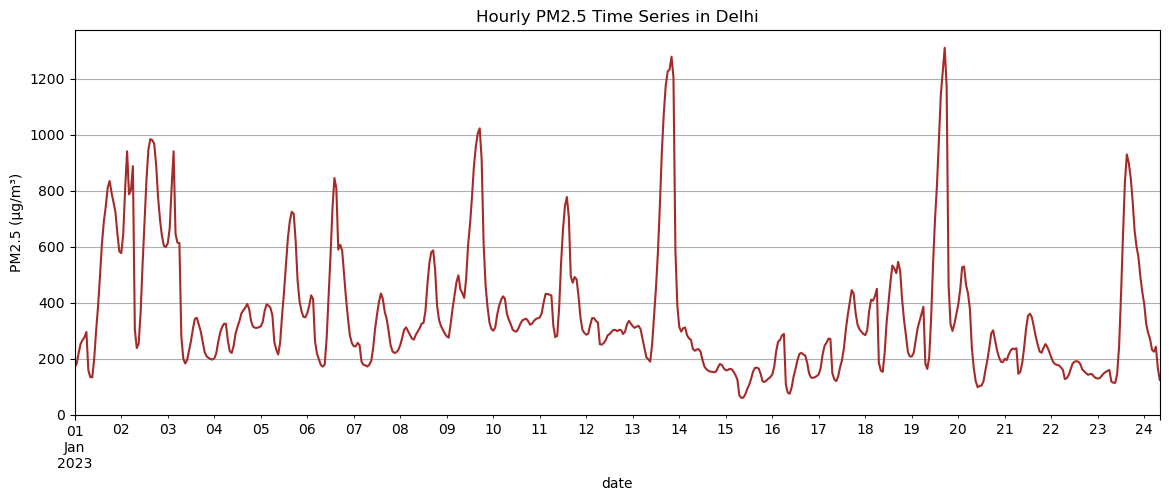

In [16]:
plt.figure(figsize=(14, 5))
df.set_index('date')['PM2.5'].plot(label='PM2.5', color='brown')
plt.title('Hourly PM2.5 Time Series in Delhi')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()